<a href="https://colab.research.google.com/github/seong-eun822/setting/blob/main/%ED%83%80%EC%9D%B4%ED%83%80%EB%8B%89_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#데이터 EDA

<BarContainer object of 12 artists>

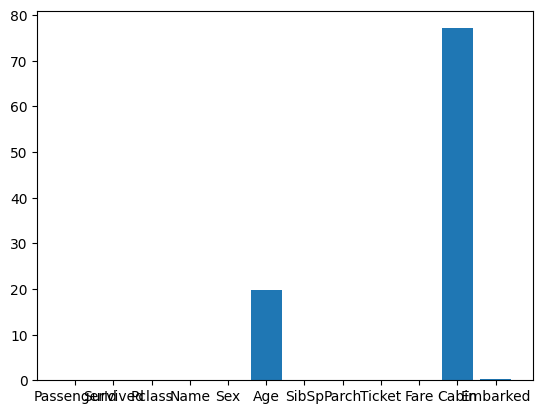

In [5]:
#결측치 비율
plt.bar(train.columns, train.isnull().sum() / train.shape[0] * 100)

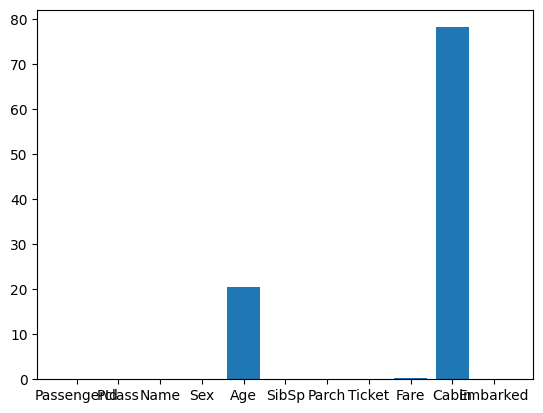

In [6]:
plt.bar(test.columns, test.isnull().sum() / test.shape[0] * 100)
plt.show()

<Axes: xlabel='Sex'>

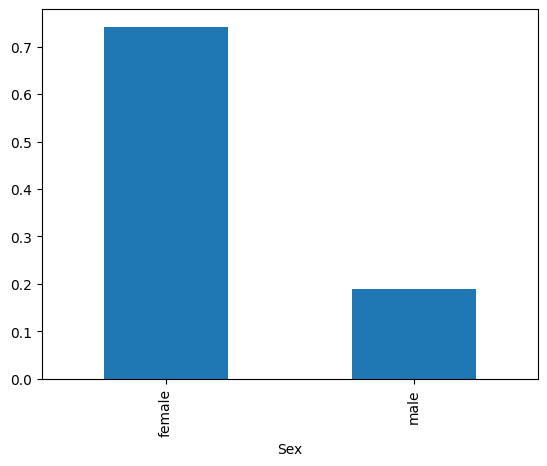

In [7]:
train.groupby("Sex")["Survived"].mean().plot.bar()

<Axes: xlabel='Pclass'>

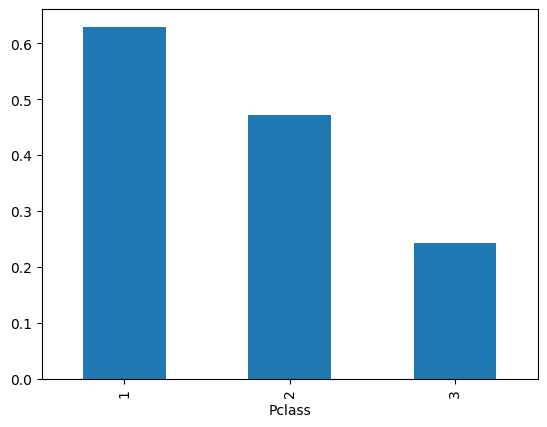

In [8]:
train.groupby("Pclass")["Survived"].mean().plot.bar()

<Axes: xlabel='Embarked'>

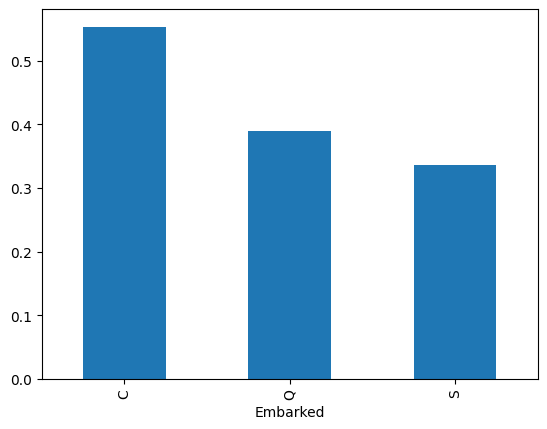

In [9]:
train.groupby("Embarked").Survived.mean().plot.bar()

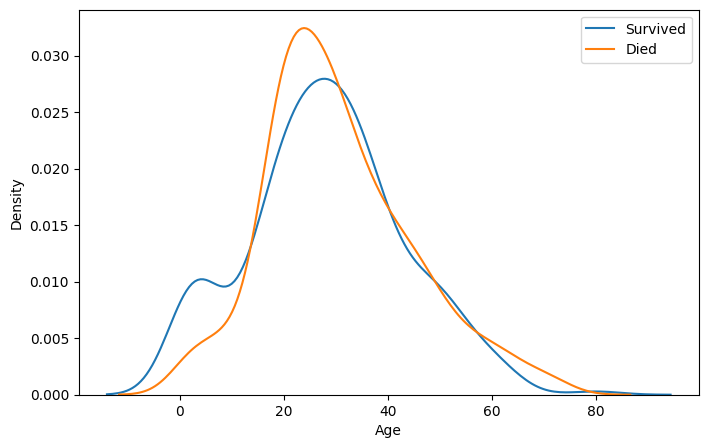

In [10]:
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
sur = train[ train['Survived'] == 1 ]
dead = train[train['Survived'] == 0]

plt.figure(figsize=(8, 5))
sns.distplot(sur['Age'], bins=25, hist=False, label="Survived")
sns.distplot(dead['Age'], bins=25, hist=False, label="Died")
plt.legend()
plt.show()

<Axes: xlabel='SibSp'>

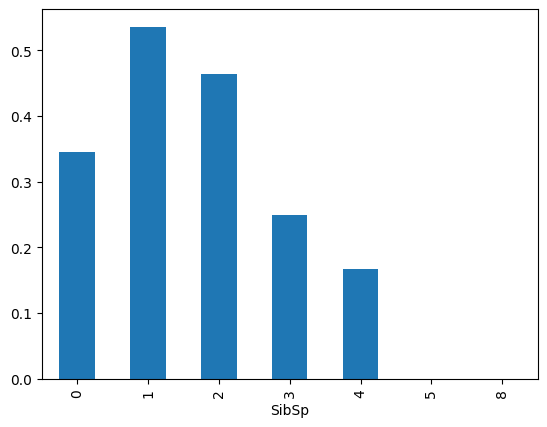

In [11]:
train.groupby("SibSp").Survived.mean().plot.bar()

<Axes: xlabel='Parch'>

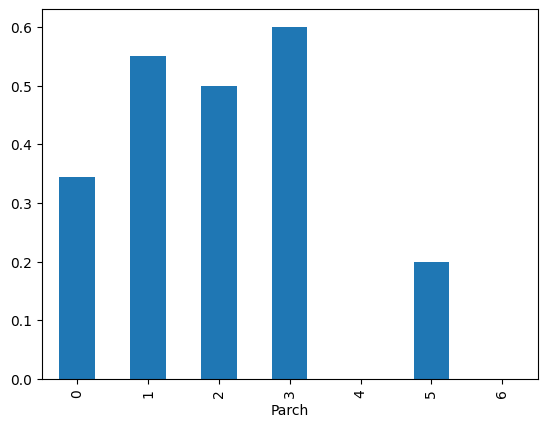

In [12]:
train.groupby("Parch").Survived.mean().plot.bar()

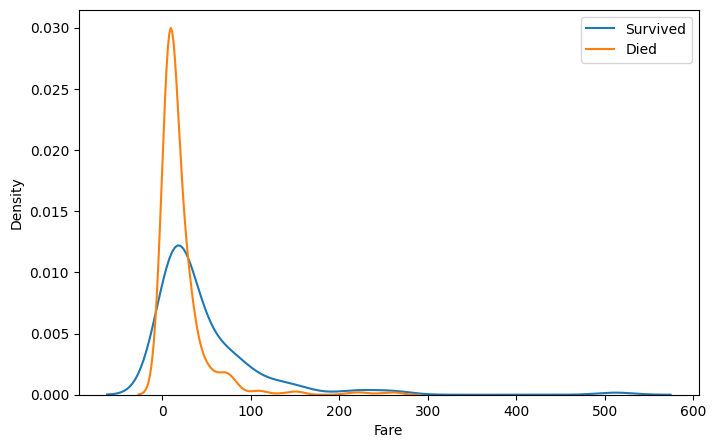

In [13]:
plt.figure(figsize=(8, 5))
sns.distplot(sur['Fare'], bins=25, hist=False, label="Survived")
sns.distplot(dead['Fare'], bins=25, hist=False, label="Died")
plt.legend()
plt.show()

#데이터 특성 엔지니어링

In [14]:
new_test = test
new_train = train

def featureEngineering1(data):
    data.drop('Ticket', axis=1, inplace=True)
    data.drop('Cabin', axis=1, inplace=True)
    data.drop('Name', axis=1, inplace=True)
    data.dropna(how='any', inplace=True)
    data.drop('Fare', axis=1, inplace=True)

featureEngineering1(new_train)
featureEngineering1(new_test)
new_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,male,22.0,1,0,S
1,2,1,1,female,38.0,1,0,C
2,3,1,3,female,26.0,0,0,S
3,4,1,1,female,35.0,1,0,S
4,5,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...,...
885,886,0,3,female,39.0,0,5,Q
886,887,0,2,male,27.0,0,0,S
887,888,1,1,female,19.0,0,0,S
889,890,1,1,male,26.0,0,0,C


In [15]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

encoder.fit(new_train['Sex'])
new_train['Sex'] = encoder.transform(new_train['Sex'])
new_test['Sex'] = encoder.transform(new_test['Sex'])

encoder.fit(new_train['Embarked'])
new_train['Embarked'] = encoder.transform(new_train['Embarked'])
new_test['Embarked'] = encoder.transform(new_test['Embarked'])

new_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,22.0,1,0,2
1,2,1,1,0,38.0,1,0,0
2,3,1,3,0,26.0,0,0,2
3,4,1,1,0,35.0,1,0,2
4,5,0,3,1,35.0,0,0,2
...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,1
886,887,0,2,1,27.0,0,0,2
887,888,1,1,0,19.0,0,0,2
889,890,1,1,1,26.0,0,0,0


In [16]:
new_train['Age'] = new_train['Age'].apply(lambda x:
    0 if x < 20
    else 1 if x < 35
    else 2)
new_test['Age'] = new_test['Age'].apply(lambda x:
    0 if x < 20
    else 1 if x < 35
    else 2)

new_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,1,0,3,1,1,1,0,2
1,2,1,1,0,2,1,0,0
2,3,1,3,0,1,0,0,2
3,4,1,1,0,2,1,0,2
4,5,0,3,1,2,0,0,2
...,...,...,...,...,...,...,...,...
885,886,0,3,0,2,0,5,1
886,887,0,2,1,1,0,0,2
887,888,1,1,0,0,0,0,2
889,890,1,1,1,1,0,0,0


In [17]:
new_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,1,0,0,1
1,893,3,0,2,1,0,2
2,894,2,1,2,0,0,1
3,895,3,1,1,0,0,2
4,896,3,0,1,1,1,2
...,...,...,...,...,...,...,...
409,1301,3,0,0,1,1,2
411,1303,1,0,2,1,0,1
412,1304,3,0,1,0,0,2
414,1306,1,0,2,0,0,0


Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5296 - loss: 0.6803 - val_accuracy: 0.6084 - val_loss: 0.6158
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6464 - loss: 0.5996 - val_accuracy: 0.7762 - val_loss: 0.5425
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7418 - loss: 0.5705 - val_accuracy: 0.7972 - val_loss: 0.4947
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7453 - loss: 0.5468 - val_accuracy: 0.7832 - val_loss: 0.4639
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7683 - loss: 0.5024 - val_accuracy: 0.8042 - val_loss: 0.4511
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7787 - loss: 0.4684 - val_accuracy: 0.8042 - val_loss: 0.4500
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7423 - loss: 0.5356 - val_accuracy: 0.8252 - val_loss: 0.4290
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7890 - loss: 0.4896 - val_accuracy: 0.8112 - 

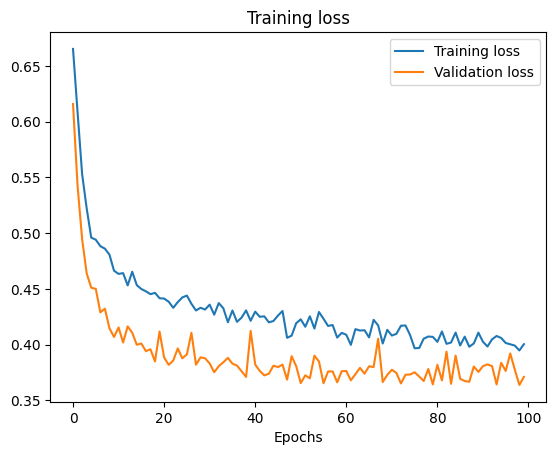

In [18]:
new_train.drop('PassengerId', axis=1, inplace=True)
X = new_train.drop('Survived', axis=1)
y = new_train['Survived']

import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(64))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(32))
model.add(tf.keras.layers.LeakyReLU(alpha=0.1))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X,y, epochs=100, validation_split=0.2)

history_dict = history.history
loss = history_dict['loss']

plt.plot(loss, label='Training loss')
plt.plot(history_dict['val_loss'], label='Validation loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.legend()
plt.show()

In [19]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=300, max_depth=100)
model.fit(X,y)
model.score(X,y)

0.8539325842696629

In [20]:
id = new_test['PassengerId']
new_test.drop('PassengerId', axis=1, inplace=True)

In [21]:
import numpy as np
sub = pd.DataFrame({
"PassengerId": id,
"Survived": model.predict(new_test)
})

sub

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
409,1301,1
411,1303,1
412,1304,1
414,1306,1


In [22]:

for i in range(892, 1310):
  if sub.loc[(sub['PassengerId'] == i), ['Survived']].empty == True:
    temp = pd.DataFrame({"PassengerId": [i],"Survived": [0]})
    sub = pd.concat([sub, temp])

sub = sub.sort_values(by=['PassengerId'])
sub.to_csv("submission.csv", index=False)